# Classification of date fruit type based on their morphological features

## INTRODUCTION :

- The date fruit (Phoenix dactylifera) has over 2500 species globally, and it can be categorized into around 200 types. Worldwide, the variety of date fruits are often used in food, medicine, and cosmetics. For our assignment, we took the dataset from a study titled “ Classification of Date Fruits into Genetic Varieties Using Image Analysis,” published by Koklu, M., Kursun, R., Taspinar., Y.S., and Cinar, I. in 2021. 

- The main features of this dataset include morphological features (i.e. Area, Perimeter, Major axis, Minor axis,…), Shape features (i.e. shapefactor_1, Shapefactor_2,…), and Color features(i.e. Mean RR, Std. dev RR, Skey RR,…). There are 7 date types in the dataset which are Barhee from the Palestinian region, Deglet Nour from Algeria region, Sukkary, Ruthana, Safawi, and Sagai from Saudi Arabia, and Rotab Mozafati from the Iran region.

- The predictive question for our project is:
 *Using the morphological feature variables, can the type of date fruit be predicted using classification modelling?*


## PRELIMINARY EXPLORATORY DATA ANALYSIS:

In [1]:
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

**READING THE DATASET :** 
- To read this dataset, we uploaded to the dataset to a google drive with open access so that we could directly read this dataset using the read_csv function. 

In [2]:
date_fruit_full_data <- read_csv("https://drive.google.com/uc?export=download&id=1jPdbQ6nzKO8h9KTi7R6VKyExp2o7Ry5P")

Rows: 898 Columns: 35
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Class
dbl (34): AREA, PERIMETER, MAJOR_AXIS, MINOR_AXIS, ECCENTRICITY, EQDIASQ, SO...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


**SELECTING NECESSARY COLUMNS :**
- Now, we use the select function to select the specific columns that we will be using for our overall data analysis.
- We have chosen "Class", "AREA", "PERIMETER", "CONVEX_AREA", "MAJOR_AXIS", and "MINOR_AXIS" as they seem to be relevant features that are important for the prediction of the Class. 


In [3]:
date_fruit_data <- select(date_fruit_full_data, "Class", "AREA", "PERIMETER", "CONVEX_AREA", "MAJOR_AXIS", "MINOR_AXIS")

**SPLITTING THE DATASET INTO TRAINING AND TESTING DATA :**
- This code below splits the data into training and testing sets using a 75%-25% split as mentioned in the "prop" argument. It stratifies the split by the "Class" column to ensure that each class is represented proportionally in both training and test sets.
- This is done to prepare the data for futher modeling, where the model is trained on one dataset and tested on another one to evaluate its perfomance. For now, we will be using the training data for further analysis and for plotting and making relevant tables. 

In [4]:
date_fruit_split <- initial_split(date_fruit_data, prop = 0.75, strata = Class)
date_fruit_train <- training(date_fruit_split)
date_fruit_test <- testing(date_fruit_split)

date_fruit_train |> head()
date_fruit_test |> head()


Class,AREA,PERIMETER,CONVEX_AREA,MAJOR_AXIS,MINOR_AXIS
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BERHI,347562,2160.354,350797,763.9877,582.8359
BERHI,382636,2275.779,385277,808.0833,609.2819
BERHI,354590,2181.739,356244,772.2312,587.4540
BERHI,439197,2437.428,443940,829.2604,677.1343
BERHI,384232,2263.482,387562,787.2324,624.8104
BERHI,433338,2423.301,436301,836.3414,664.9469


Class,AREA,PERIMETER,CONVEX_AREA,MAJOR_AXIS,MINOR_AXIS
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BERHI,408953,2326.693,410036,840.1821,622.0076
BERHI,420044,2391.123,423531,836.9280,645.1822
BERHI,467092,2514.243,469638,895.3616,669.6182
BERHI,356022,2170.310,358086,756.3358,603.8934
BERHI,314313,2040.285,316111,728.9534,550.9473
BERHI,347694,2187.456,351288,791.2161,563.1738


**SUMMARIZING THE TRAINING DATA :**
- Now, we use group_by() and summarize() functions together to calculate mean values for several physical charateristics that we selected earlier.
- This helps us to understand the average physical properties of each fruit date class, which further would help us provide insights for exploratory data analysis.

In [5]:
date_fruit_mean <- date_fruit_train |> 
group_by(Class) |> 
summarize(
    count = n(),
    mean_area = mean(AREA),
    mean_perimeter = mean(PERIMETER),
    mean_convex_area = mean(CONVEX_AREA),
    mean_major = mean(MAJOR_AXIS),
    mean_minor = mean(MINOR_AXIS))

date_fruit_mean

Class,count,mean_area,mean_perimeter,mean_convex_area,mean_major,mean_minor
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BERHI,53,406158.5,2323.059,408609.0,814.0197,637.0900
DEGLET,75,239726.9,1853.415,243215.2,685.6785,446.6358
DOKOL,149,146855.8,1445.274,148641.9,541.6329,344.3458
IRAQI,52,434935.8,2412.904,437925.7,839.1761,663.2078
ROTANA,127,384314.2,2364.663,391844.8,827.9667,598.6624
SAFAVI,146,335363.8,2333.592,344599.7,880.4506,490.9316
SOGAY,69,287560.8,2049.670,294812.3,756.0604,491.8277


**VISUALIZATION DIFFERENT RELATIONSHIPS USING PLOTS :**
- We first chose the two columns perimeter and area and plotted them using geom_point() as shown below. This shows a relationship between Perimeter and Area, with different classes shown by different color.
- This shows that the k-nn classifier algorithm will work on this dataset for predicting the date fruit type. 

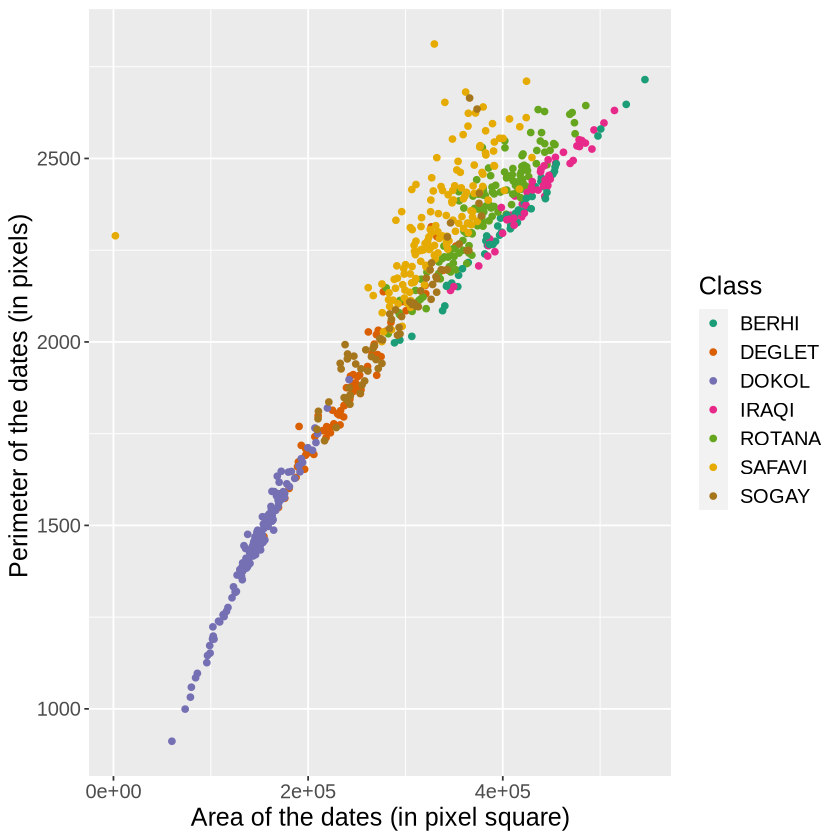

In [6]:
library(scales)

perimeter_vs_area <- ggplot(date_fruit_train, aes(x = AREA,
                     y = PERIMETER,
                     color = Class)) +
  geom_point() +
  xlab("Area of the dates (in pixel square)") +
  ylab("Perimeter of the dates (in pixels) ") +
  theme(text = element_text(size = 15),
        legend.direction = "vertical") +
  scale_color_brewer(palette = "Dark2") 

perimeter_vs_area

- Now, we visualize a scatter plot between Major and Minor Axis which is also colored by class.

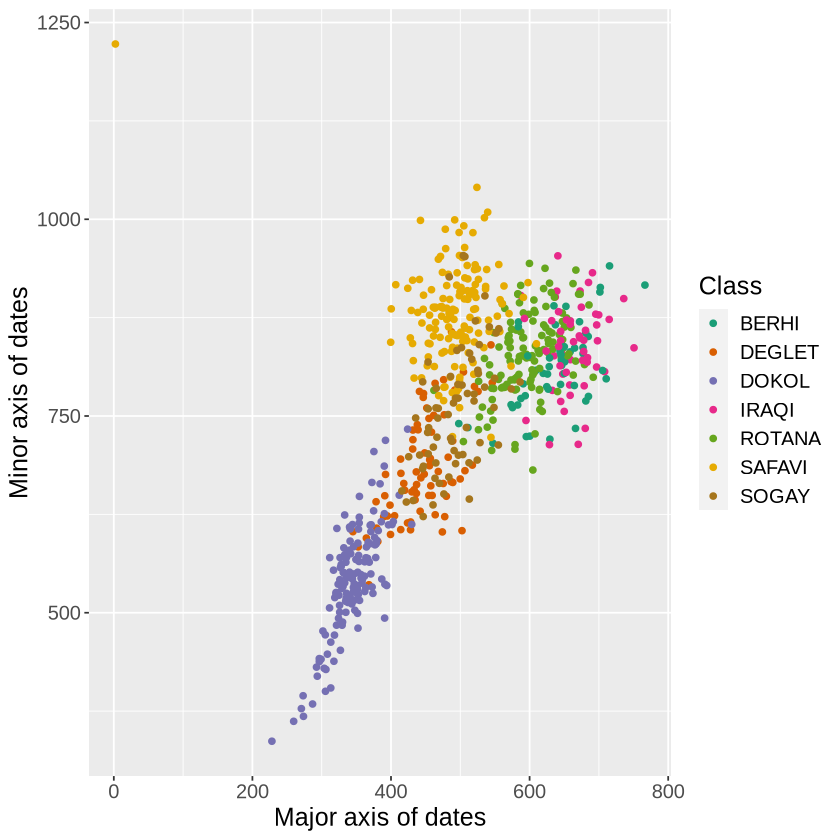

In [7]:
major_vs_minor <- ggplot(date_fruit_train, aes(x = MINOR_AXIS,y = MAJOR_AXIS,color = Class)) +
                  geom_point() +
                  xlab("Major axis of dates") +
                  ylab("Minor axis of dates") +
                  theme(text = element_text(size = 15),
                        legend.direction = "vertical") +
                  scale_color_brewer(palette = "Dark2")

major_vs_minor

## METHODS

- We selected the variables/predictors by graphing each column individually and observing which of the variables clustered with respect to the “class” variable. Moreover, the methodology that our group will use to visualize our data is by plotting the variables on scatter plots and use the k-Nearest Neighbor(KNN) algorithm to obtain a prediction through observing the ‘k’ closest data points on the feature space.

## EXPECTED OUTCOMES AND SIGNIFICANCE

#### What do you expect to find?
With the predictors chosen and the model we create, we should be able to classify different types of date fruit into its correct type based on its morphological features that we have selected as predictors. 

#### What impact could such findings have?
The model that we create could have impacts over many fields, it could be a fledgling stage for an automated sorting system used in the field of agriculture. An accurate predictive model can help farms to sort fruit types as they are harvested, it can efficiently classify the fruit types and reduce the cost of labor and time. 
#### What future questions could this lead to?
The investigation of the predictive model leads to deeper future questions with respect to binding farming practices and data science. Our group is interested in whether we could make even more advanced predictions with the external features of the fruits and predict the quality of the fruit. 



